In [2]:
import numpy as np
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

In [4]:
def plot_graph(A,p):
    n,n=A.shape
    fig, ax = plt.subplots()
    ax.scatter(p[:,0],p[:,1],color="gray",edgecolor='black')
    for i in range(0,n-1):
        for j in range(i+1,n):
            if (A[i,j] != 0):
                ax.plot([p[i,0],p[j,0]],[p[i,1],p[j,1]],color="gray",linewidth=0.5)
    #ax.show()
    return(fig, ax)


def adj_matrix(Tri_l,n):
    W = np.zeros((n,n))
    for t in Tri_l:
        W[t[0],t[1]]=1
        W[t[1],t[0]]=1
        W[t[0],t[2]]=1
        W[t[2],t[0]]=1
        W[t[1],t[2]]=1
        W[t[2],t[1]]=1

    return(W)

In [4]:
n = 100
points = np.random.uniform(low=-1.0, high=1.0, size=(n,2))

tri = Delaunay(points[:,0:2])
A = adj_matrix(tri.simplices,points.shape[0])

L = np.diag(np.sum(A,axis=1)) - A

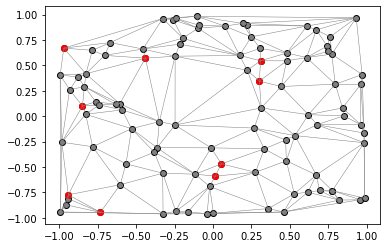

In [5]:
fig, ax = plot_graph(A,points)
n_const = 10
pt = np.random.randint(0,n,n_const)
ax.scatter(points[pt,0],points[pt,1],color='red')

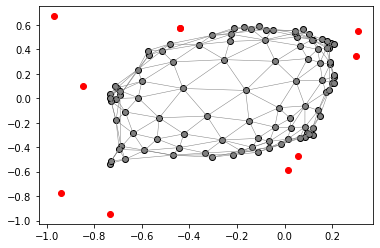

In [6]:
ct = 1
Lt = np.zeros((n+n_const,n))
Lt[:n] = L[:]
Lt[np.arange(n,n+n_const),pt] = ct
#print(Lt)

b = np.zeros((n+n_const,2))
b[n:] = points[pt]
#print(b)

new_points = np.linalg.solve(np.dot(Lt.T,Lt),np.dot(Lt.T,b))
# # print(np.dot(Lt.T,Lt))
# # print(np.dot(Lt.T,b))
# #print(new_points)

fig, ax = plot_graph(A,new_points)
ax.scatter(points[pt,0],points[pt,1],color='red')
# ax.scatter(new_points[pt[0],0],new_points[pt[0],1],color='red')
# ax.scatter(new_points[pt[1],0],new_points[pt[1],1],color='blue')

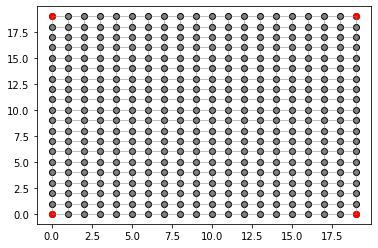

In [5]:
Ar = np.loadtxt("rgd20.adj")
X = np.loadtxt("rgd20.xy")
n = int(np.sqrt(X.shape[0]))

fig, ax = plot_graph(Ar,X[:,:2])

constraint = np.array([0,n-1,n**2-n,n**2-1])

plt.scatter(X[constraint,0],X[constraint,1],color='red')

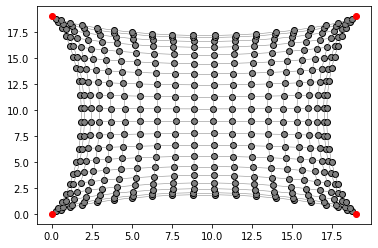

In [6]:
Lr = np.diag(np.sum(Ar,axis=1)) - Ar

Ltr = np.zeros((n**2+constraint.size,n**2))
Ltr[:n**2] = Lr[:]
Ltr[np.arange(n**2,n**2+constraint.size),constraint] = 1

br = np.zeros((n**2+constraint.size,2))
br[n**2:] = X[constraint]

new_pointsr = np.linalg.solve(np.dot(Ltr.T,Ltr),np.dot(Ltr.T,br))

fig, ax = plot_graph(Ar,new_pointsr)
plt.scatter(X[constraint,0],X[constraint,1],color='red')

In [7]:
G = np.linalg.cholesky(np.dot(Ltr.T,Ltr))

In [8]:
br[-1,0] = 20.0
br[-1,1] = 10.0

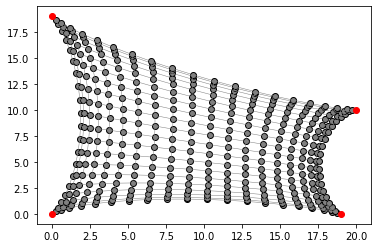

In [10]:
import scipy.linalg as sl

y = sl.solve_triangular(G,np.dot(Ltr.T,br),lower=True,unit_diagonal=False,check_finite=False)
x = sl.solve_triangular(G.T,y,lower=False,unit_diagonal=False,check_finite=False) 

fig, ax = plot_graph(Ar,x)
plt.scatter(br[n**2:,0],br[n**2:,1],color='red')

In [ ]:
pct = 1e5
P = np.zeros((n,n))
P[pt,pt] = pct

bc = np.zeros((n,2))

Lc = L + P
bc[pt] = points[pt]*pct
#print(bc)

Pnew_points = np.linalg.solve(Lc,bc)

fig, ax = plot_graph(A,Pnew_points)
ax.scatter(points[pt,0],points[pt,1],color='red')

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

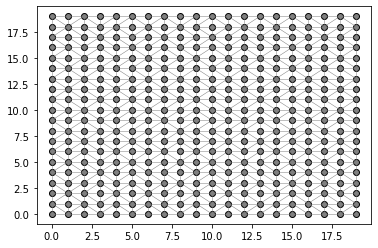

In [11]:
#Adj = np.loadtxt('rgd20.adj')
#X = np.loadtxt('rgd20.xy')

tri = Delaunay(X)
Adj = adj_matrix(tri.simplices,X.shape[0])

plot_graph(Adj,X)

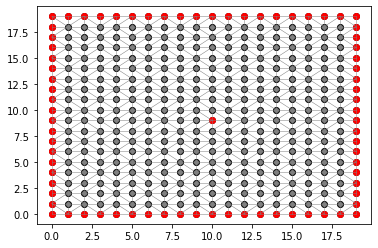

In [50]:
rpt = int(np.sqrt(X.shape[0]))
ptct = np.zeros(4*rpt-3).astype(int)
# print(np.arange(rpt),len(np.arange(rpt)))
# print(np.arange(1,rpt-1)*rpt,len(np.arange(1,rpt-1)*rpt))
# print(np.arange(rpt*(rpt-1), rpt*rpt),len(np.arange(rpt*(rpt-1), rpt*rpt)))
# print(np.arange(1,rpt-1)*rpt + rpt - 1,len(np.arange(1,rpt-1)*rpt + rpt - 1))
# print(len(np.arange(rpt)))
# print(len(np.arange(rpt,2*rpt-2)))
# print(len(np.arange(2*rpt-2,3*rpt-2)))
# print(len(np.arange(3*rpt-2,4*rpt-4)))
ptct[:rpt] = np.arange(rpt)
ptct[rpt:2*rpt-2] = np.arange(1,rpt-1)*rpt
ptct[2*rpt-2:3*rpt-2] = np.arange(rpt*(rpt-1), rpt*rpt)
ptct[3*rpt-2:4*rpt-4] = np.arange(1,rpt-1)*rpt + rpt - 1
ptct[-1] = int((rpt**2-rpt)/2)

f, ax = plot_graph(Adj,X)
ax.scatter(X[ptct,0],X[ptct,1],color='red')

[19000. 19000.]


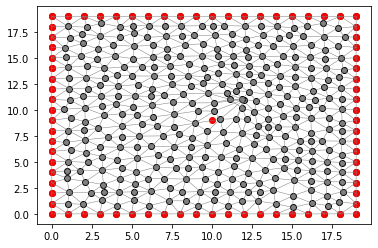

In [56]:
pct = 1e3

Lr = np.diag(np.sum(Adj,axis=1)) - Adj
P = np.zeros(Lr.shape)
P[ptct,ptct] = pct

brc = np.zeros(X.shape)

Lrc = Lr + P
brc[ptct[:-1]] = X[ptct[:-1]]*pct
brc[ptct[-1]] = (X[ptct[-1]]+np.array([2,2]))*pct
print(brc[-1])

Pnew_points = np.linalg.solve(Lrc,brc)

fig, ax = plot_graph(Adj,Pnew_points)
ax.scatter(X[ptct,0],X[ptct,1],color='red')